# The&nbsp;foodie&nbsp;app!

Team: Rhodasie, Dennies, Margaux

Tutor: Emmanuel

**Aim of this project and app**

add details here

**Organisation of the notebook**

* Food Classification Models
** Training
** Analysis
* Semantic Search Model
** Latent Semantic Indexing
** Term-frequency-inverse document frequency
* Analysis
* Sentiment Analyses Model
** train dataset: create the sentiment score and class
** run the model on the whole yelp database (output is stored and run once a week??)


**The app**

few words maybe...?

**The database**

blabla bla



### Food Classification Models 

The user input is analysed and categrised by three text classification models into:
1. Meal type: appetiser, entree, breakfast etc
2. Cuisine type: italian, asian, etc
3. Diet type: vegeterian or non-vegeterian

In [ ]:
!python -m spacy download en

2022-04-09 18:10:09.493535: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-09 18:10:09.493601: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 13.7 MB/s 
  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Not uninstalling typing-extensions at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/p

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import json
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import pickle
import string
import matplotlib.pyplot as plt
import seaborn as sns

#modules and libraries for training
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import spacy
from spacy_langdetect import LanguageDetector


/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Pre-processing Helper

In [ ]:
#Tokenization and dpre-processing for nlp
punct = string.punctuation
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("spacytextblob")
stopwords = list(STOP_WORDS)


def text_data_cleaning(sentence):
    '''
    
    Takes a text and pre-processes it for downstream nlp
    input: single document
    output: returns a tokenised document
    
    '''
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

#### 1) Meal type classifier

In [ ]:
### Dataset is a collection of menu items popular since the 1980's in america###
################################################################################

american=pd.read_csv("/work/Foodie data/historicalamerican/dohmh-menustat-historical-1.csv")
AmX=american['Item_Description'] #feature is description of menu item
target =american['Food_Category'] 
american['Food_Category'].value_counts()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3229: DtypeWarning: Columns (9,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Beverages                 23396
Toppings & Ingredients    10153
Entrees                    7579
Sandwiches                 6391
Appetizers & Sides         4123
Pizza                      3373
Desserts                   3016
Baked Goods                1908
Salads                     1807
Burgers                    1558
Soup                       1175
Fried Potatoes              740
Name: Food_Category, dtype: int64

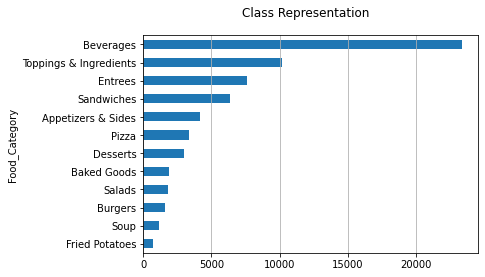

In [ ]:
#Visualise the distribution of our target
fig, ax = plt.subplots()
fig.suptitle("Class Representation", fontsize=12)
american['Food_Category'].reset_index().groupby("Food_Category").count().sort_values(by= 
        "index").plot(kind="barh", legend=False, 
         ax=ax).grid(axis='x')
plt.show()

In [ ]:
# Model Training

# create a mapping of unique label texts to unique integers
labelencoderCourse = LabelEncoder()
ym = labelencoderCourse.fit_transform(target)

#pre-processing
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)

# Logistic regression classifier
course =LogisticRegression(solver='saga')
Xm=AmX #features
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size = 0.2, random_state = 42)
Xm_train.shape,Xm.shape, ym_train.shape
course = Pipeline([('tfidf', tfidf), ('course', course)])
course.fit(Xm_train, ym_train)
filename = 'meal_model.sav' #save model for use on backend of foodie_app
pickle. dump(course, open(filename, 'wb'))

In [ ]:
#Check the performance of the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#course= pickle.load(open('/kaggle/working/meal_model.sav', 'rb')) #load  saved model
ym_pred=course.predict(Xm_test)
print(classification_report(ym_test, ym_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       851
           1       0.92      0.87      0.89       379
           2       0.99      1.00      0.99      4678
           3       0.92      0.92      0.92       321
           4       0.96      0.96      0.96       581
           5       0.84      0.91      0.87      1484
           6       0.82      0.70      0.75       147
           7       0.96      0.95      0.96       683
           8       0.90      0.86      0.88       409
           9       0.91      0.93      0.92      1220
          10       0.96      0.92      0.94       251
          11       0.88      0.85      0.87      2040

    accuracy                           0.93     13044
   macro avg       0.91      0.89      0.90     13044
weighted avg       0.93      0.93      0.93     13044



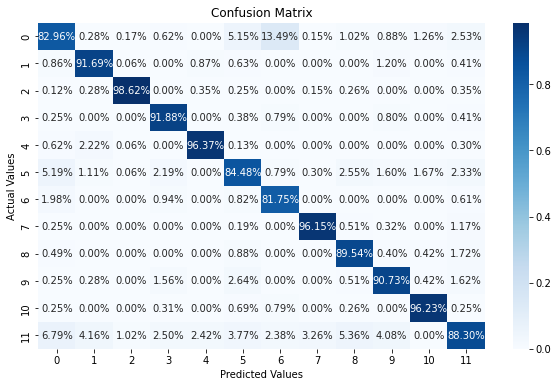

In [ ]:
#Plotting the confusion matrix
cm_meal = confusion_matrix(ym_test, ym_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df1 = pd.DataFrame(cm_meal)


plt.figure(figsize=(10,6))
sns.heatmap(cm_df1/np.sum(cm_df1), annot=True, cmap='Blues', fmt='.2%')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


#### 2) Cuisine type classifier

In [ ]:
### Data is recipes from Yummly.com ###
#######################################
recipes=pd.read_json('/work/Foodie data/recipes/train.json')
recipes.head(1)

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."


In [ ]:
#Remove  nested list
recipes['ingredients_mod'] = [' '.join([re.sub('[^A-Za-z]', ' ,', line) for line in lists]).strip() for lists in recipes['ingredients']]

# Filtering by common Veg/Non-Veg recipe ingredients and adding diet column into the data set 
mylist =['fish', 'goat','mayonaise', 'butter', 'chicken', 'burger','beef','pork','prawn','egg','Katsuobushi','mackrel','fillet','lamb','steak','salmon','shrimp','bacon','ham','turkey','duck','seafood','squid']
pattern = '|'.join(mylist) 
recipes['diet']=recipes.ingredients_mod.str.contains(pattern) 
recipes.loc[recipes.diet == True,'diet'] = 'non-vegetarian'
recipes.loc[recipes.diet == False,'diet'] = 'vegetarian'

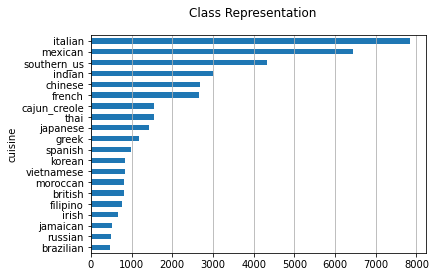

In [ ]:
#Visualise the distribution of the classes

fig, ax = plt.subplots()
fig.suptitle("Class Representation", fontsize=12)
recipes['cuisine'].reset_index().groupby("cuisine").count().sort_values(by= 
        "index").plot(kind="barh", legend=False, 
         ax=ax).grid(axis='x')
plt.show()

In [ ]:
#Train the cuisine classier
cuisine = LogisticRegression(solver='saga')

#cuisne type model
XC=recipes['ingredients_mod'] #features

#label encoding
labelencoderCuisine = LabelEncoder()
yc=recipes['cuisine']
yc = labelencoderCuisine.fit_transform(yc)

#split dataset into train and test
XC_train, XC_test, yc_train, yc_test = train_test_split(XC, yc, test_size = 0.2, random_state = 42)
XC_train.shape, XC_test.shape, yc.shape

#train the model
cuisine= Pipeline([('tfidf', tfidf), ('cuisine', cuisine)])
cuisine.fit(XC_train, yc_train)
filename = 'cuisine_model.sav' #save model
pickle. dump(cuisine, open(filename, 'wb'))

In [ ]:
#Check the performance of the model
yc_pred = cuisine.predict(XC_test)
print(classification_report(yc_test, yc_pred))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62        84
           1       0.66      0.35      0.46       157
           2       0.81      0.66      0.73       328
           3       0.76      0.86      0.81       510
           4       0.72      0.52      0.60       136
           5       0.61      0.65      0.63       550
           6       0.78      0.67      0.72       249
           7       0.87      0.90      0.89       602
           8       0.64      0.40      0.49       151
           9       0.79      0.91      0.84      1567
          10       0.92      0.59      0.72        91
          11       0.82      0.71      0.76       284
          12       0.87      0.74      0.80       166
          13       0.90      0.93      0.92      1336
          14       0.86      0.75      0.80       166
          15       0.56      0.39      0.46        89
          16       0.67      0.79      0.72       848
          17       0.67    

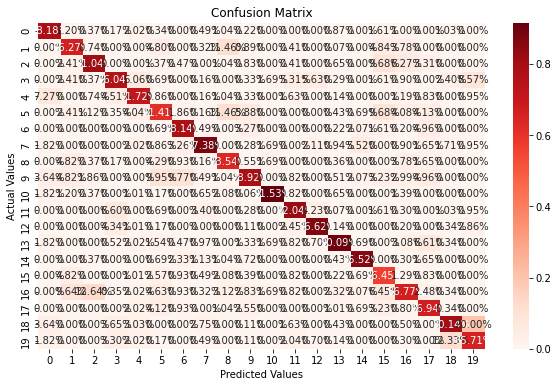

In [ ]:
#Plotting the confusion matrix
cm_cuisine = confusion_matrix(yc_test, yc_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_cuisine)
#
plt.figure(figsize=(10,6))
sns.heatmap(cm_df/np.sum(cm_df), annot=True, cmap='Reds', fmt='.2%')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### 3) Diet Type

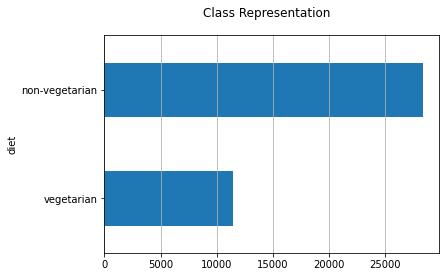

In [ ]:
#Visulaise distribution of classes
fig, ax = plt.subplots()
fig.suptitle("Class Representation", fontsize=12)
recipes['diet'].reset_index().groupby("diet").count().sort_values(by= 
        "index").plot(kind="barh", legend=False, 
         ax=ax).grid(axis='x')
plt.show()

In [ ]:
#Train the diet type classifer
diet = LogisticRegression(solver='saga')

#Select features and labels
Xd=recipes['ingredients_mod'] #features

#encode labels
labelencoderD = LabelEncoder()
yd = labelencoderD.fit_transform(recipes['diet'])

#Split data into test and train
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.2, random_state = 42)

#Train the model
diet = Pipeline([('tfidf', tfidf), ('diet', diet)])
diet.fit(Xd_train, yd_train)
filename = 'diet_model.sav' #save model
pickle. dump(diet, open(filename, 'wb'))

In [ ]:
#Check model performance
yd_pred = diet.predict(Xd_test)
print(classification_report(yd_test, yd_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5668
           1       0.98      1.00      0.99      2287

    accuracy                           0.99      7955
   macro avg       0.99      0.99      0.99      7955
weighted avg       0.99      0.99      0.99      7955



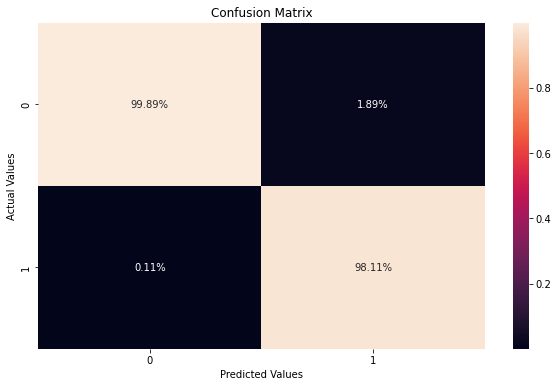

In [ ]:
#Plotting the confusion matrix
cm_diet = confusion_matrix(yd_test, yd_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df2 = pd.DataFrame(cm_diet)
#
plt.figure(figsize=(10,6))
sns.heatmap(cm_df2/np.sum(cm_df2), annot=True, fmt='.2%')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Semantic Search Model

In order to include some flexibility in matching the categories extracted from the user input to the categories in the yelp dataset, a semantic search is needed. This gensim model calculates a similarity matrix between the input categories and dataset and filters by a similarity score. The businesses selected here will be used for downstream semantic analysis of reviews.

In [ ]:
#load dataset .Uses yelp dataset
business=pd.read_json('/work/Foodie data/yelp_academic_dataset_business.json/yelp_academic_dataset_business.json', lines=True)
business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None


In [ ]:
# Select only restaurants from all the businesses in the data
business['restaurant']= business.categories.str.contains(pat='Restaurants|Restaurant|food',flags=re.IGNORECASE, regex=True)
print(business[business.restaurant == True].shape)
resto = business[(business.restaurant == True) & (business.is_open == 1)]
print(resto.shape)
resto.head()

(64629, 15)
(44594, 15)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,restaurant
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",True
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",True
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",True
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",True
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",True


In [ ]:
#create a column for cleaned and tokenised categories
resto['categories_mod']= resto.categories.apply(text_data_cleaning)
resto=resto.reset_index() #index has to be reset 
resto.head(1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,restaurant,categories_mod
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",True,"[restaurants, food, bubble, tea, coffee, tea, ..."


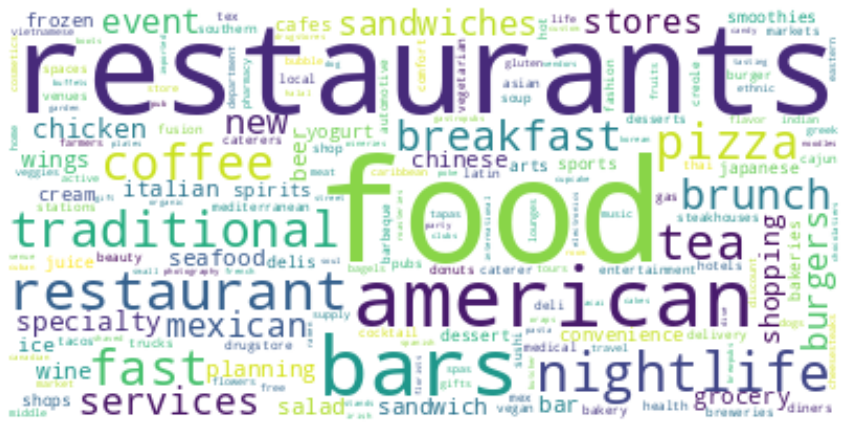

In [ ]:
#Checking the most common words in our data
from wordcloud import WordCloud

series = pd.Series(np.concatenate(resto['categories_mod'])).value_counts()[:]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)
resto['categories_mod'].head()
plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Topic modelling with Latent Semantic Indexing and TF-IDF 

In [ ]:
#create corpus
from gensim import corpora
res = resto['categories_mod']
dictionary = corpora.Dictionary(res)
dictionary.save('./categories.dict')  # store the dictionary, for future reference

In [ ]:
#create Bag-Of-Words
cat_corpus = [dictionary.doc2bow(text) for text in res]

#check out some words frequencies
word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in cat_corpus[0:3]] #limit number to print
print(word_frequencies)

[[('bakery', 1), ('bubble', 1), ('coffee', 1), ('food', 1), ('restaurants', 1), ('tea', 2)], [('food', 1), ('breweries', 1), ('brewpubs', 1)], [('food', 2), ('restaurants', 1), ('burger', 1), ('cream', 1), ('fast', 1), ('frozen', 1), ('ice', 1), ('sandwiches', 1), ('yogurt', 1)]]


In [ ]:
corpora.MmCorpus.serialize('./categories.mm', cat_corpus)  # store corpus for use in foodie-app

In [ ]:
#Train tfdif and lsi model for semantic search
import gensim

#Tf-idf model
tfidf_model = gensim.models.TfidfModel(cat_corpus, id2word=dictionary)
filename = 'tfidf_model.sav'
pickle. dump(tfidf_model, open(filename, 'wb'))

#Lsi model
lsi_model = gensim.models.LsiModel(tfidf_model[cat_corpus], id2word=dictionary)
filename = 'lsi_model.sav'
pickle. dump(lsi_model, open(filename, 'wb'))

#store the corpus for use in foodie-app
gensim.corpora.MmCorpus.serialize('tfidf_model_mm', tfidf_model[cat_corpus]) #save corpus
gensim.corpora.MmCorpus.serialize('lsi_model_mm',lsi_model[tfidf_model[cat_corpus]]) #save corpus

In [ ]:
#load indexed corpus
tfidf_corpus = gensim.corpora.MmCorpus('tfidf_model_mm')
lsi_corpus = gensim.corpora.MmCorpus('lsi_model_mm')

### Processing User Input

In [ ]:

######How models are loaded in the backend of the foodie-app  #####
################################################################
#Load saved models 
course_model= pickle.load(open('/work/Foodie data/Basic_classification_models/meal_model.sav', 'rb'))
diet_model= pickle.load(open('/work/Foodie data/Basic_classification_models/diet_model.sav', 'rb'))
cuisine_model= pickle.load(open('/work/Foodie data/Basic_classification_models/cuisine_model.sav', 'rb'))
lsi_model =  pickle.load(open('/work/Foodie data/SemanticSearch/lsi_model.sav', 'rb'))
tfidf_model=  pickle.load(open('/work/Foodie data/SemanticSearch/tfidf_model.sav', 'rb'))

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.0.2. This might lead to b

In [ ]:
# Run label encoders 
#load files for encoding
meals= pd.read_csv("/work/Foodie data/tokens/Meals_token.csv")
recipe= pd.read_csv("/work/Foodie data/tokens/Recipe_token.csv")
#run encoders
## creating mapping from unique label texts to unique integers
labelencoderCourse = LabelEncoder()
labelencoderCourse.fit_transform(meals['Food_Category'])
labelencoderDiet = LabelEncoder()
labelencoderDiet.fit_transform(recipe['diet'])
labelencoderCuisine = LabelEncoder()
labelencoderCuisine.fit_transform(recipe['cuisine'])

array([ 6, 16,  4, ...,  8,  3, 13])

In [ ]:
#user input simulation
inputs= []
inp =['I want to eat spicy potatoes of some kind. Maybe fries.']
inpt = text_data_cleaning(' '.join(inp)) #tokenise input

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
#expand vocubulary for input
import nltk
from nltk.corpus import wordnet

inputs=[]
for i in inpt:
    for synset in wordnet.synsets(i):
        for lem in synset.lemmas():
            inputs.append(lem.name()) 

input_test= [','.join(inputs)]
print(input_test)

['privation,want,deprivation,neediness,lack,deficiency,want,need,want,wish,wishing,want,desire,want,want,need,require,want,want,want,eat,eat,feed,eat,eat,eat_on,consume,eat_up,use_up,eat,deplete,exhaust,run_through,wipe_out,corrode,eat,rust,piquant,savory,savoury,spicy,zesty,hot,spicy,blue,gamy,gamey,juicy,naughty,racy,risque,spicy,potato,white_potato,Irish_potato,murphy,spud,tater,potato,white_potato,white_potato_vine,Solanum_tuberosum,kind,sort,form,variety,kind,kind,genial,kind,tolerant,possibly,perchance,perhaps,maybe,mayhap,peradventure,Fry,Roger_Fry,Roger_Eliot_Fry,Fry,Christopher_Fry,child,kid,youngster,minor,shaver,nipper,small_fry,tiddler,tike,tyke,fry,nestling,fry,fry,electrocute,fry']


In [ ]:
#run food_type classifier models on the user input
predm=course_model.predict(input_test) #classifies course or meal type
predd=diet_model.predict(input_test) #classifies diet type
predc=cuisine_model.predict(input_test) #classifies cuisine type

#labels must be inverse_transformed to words for matching to our restaurant database
categories = [' '.join(labelencoderCourse.inverse_transform(predm)), ''.join(labelencoderDiet.inverse_transform(predd)), ''.join(labelencoderCuisine.inverse_transform(predc))] 
print(categories) #these categories will be used downstream to search for restaurants using semantic search

['appetizer', 'vegetarian', 'italian']


### Match Categories From User Input to Data

In [ ]:
### Load saved copus and dictionaries ###
#########################################


In [ ]:
#generate a similarity matrix in our corpus
from gensim.similarities import MatrixSimilarity
business_index = MatrixSimilarity(lsi_corpus, num_features = lsi_corpus.num_terms)

NameError: name 'lsi_corpus' is not defined

In [ ]:
from operator import itemgetter
tokenizer = text_data_cleaning
def search_similar(search_term):
    '''
    performs semantic search and similarity on a series of documents
    input: search_term is a document or series of documents
    returns: dataframe of most similar matches in descending order
    '''

    query_bow = dictionary.doc2bow(tokenizer(search_term))
    query_tfidf = tfidf_model[query_bow]
    query_lsi = lsi_model[query_tfidf]

    business_index.num_best = 50 #get the 50 most similar categories to our query

    business_list = business_index[query_lsi]

    business_list.sort(key=itemgetter(1), reverse=True)
    business_names = []

    for j, business in enumerate(business_list):

        business_names.append (
            {
                'Relevance': round((business[1] * 100),2),
                'name': resto['name'][business[0]],
                'business_id': resto['business_id'][business[0]],
                'categories': resto['categories_mod'][business[0]]
            }

        )
        if j == (business_index.num_best-1):
            break

    return pd.DataFrame(business_names, columns=['Relevance', 'name', 'business_id','categories'])

In [ ]:
#returns the categories from dataset that are related to categories from the user_input
search_similar(' '.join(categories))

,Relevance,name,business_id,categories
0,91.26,OPPI’Z Bistro And Natural Pizza,f7S0WFDy_J1TGahYhnoMLA,"[pizza, restaurants, italian, vegetarian]"
1,80.00,The QUICK FIXX,LtLbT776NOAjva1ttA2h3w,"[restaurants, pizza, vegetarian, salad, italian]"
2,76.37,Hip City Veg,7AV88DN083bPNmNue2my4Q,"[vegetarian, restaurant]"
3,74.74,Ground Foods Cafe,4PXVOfKw7kzKq3mS4DGwYg,"[vegetarian, vegan, italian, restaurants]"
4,73.75,Flying Pie Pizzaria,rEyTFs9o-xdXR-DMCLBiyg,"[restaurants, pizza, vegetarian]"
5,70.75,PLNT Burger,OT9SZuEFV-7lVMCcsZmb6Q,"[restaurants, burgers, vegetarian]"
6,70.75,Fat Mo's,Q5gW8CA-IKGeb_hFjzJGKQ,"[vegetarian, restaurants, burgers]"
7,70.65,Fieni's Ristorante,UPP2p7oGUrOfZ919RZqVIQ,"[restaurant, vegetarian, italian, seafood, foo..."
8,70.59,La Indita,dHpHptXgn1gpuxr_4DrMYQ,"[mexican, restaurants, vegetarian]"
9,69.99,Romaine's,SHk_eYKzIOPvgwvTThtXiQ,"[american, traditional, vegetarian, restaurants]"


############### SECOND STEP #############

### Sentiment Analyses model

* EDA: Description of the dataset used and the sentiment score created 
* The model
* Accuracy and confusion Matrix


### Create a training dataset and sentiment score

In [ ]:
# we decided here to take 5000 reviews in each star category to have a balance training set
train_df = reviews.groupby('stars').apply(lambda x: x.sample(5000))
print(train_df.shape)

In [ ]:
# Remove the reviews that aren't in english
nlp = spacy.load('en')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)


rev_to_remove=[]

def detect_language(text):
  doc = nlp(text)
  lang = doc._.language
  return list(lang.values())[0]

for i,text in enumerate(train_df['text']):
  lan = detect_language(text)
  if lan != 'en':
    #print(lan)
    rev_to_remove.append(train_df.review_id.iloc[i])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5b5f1575-2c47-46b3-8679-13eab50fcc44' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>